<a href="https://colab.research.google.com/github/brmontgomery/483-Intro_To_ML_Assignments/blob/main/%20Project%202%20-%20Numpy%2C%20Polynomial%20Regression%2C%20and%20Cross-Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2 - Numpy, Polynomial Regression, and Cross-Validation
**Group members:** Zach Hofmeister, Brian Montgomery, and Karla Cabrera. <br>
**Section:** CS 483-02 <br>
**Semester:** Fall 2021 <br>
**Project Summary:** For this project we used NumPy to implement vectorized linear and polynomial regression models and compare their performance using separate training and test sets from a dataset.


#Experiment 1
Use numpy.load() to load the dataset and examine the contents of the first few rows.

In [ ]:
import numpy as np
data = np.loadtxt('dataset.csv', delimiter=',', skiprows=1)
print(f"First part of the dataset:\n{data[0:5]}")

First part of the dataset:
[[-0.59828843  0.46192254 -1.34862803]
 [-1.74575782 -1.41239652  1.67154097]
 [-1.16639696 -0.06900688 -1.99250735]
 [-0.86156208 -1.6482701   1.39107574]
 [-3.76750436 -1.79155834  0.448392  ]]


##Results
We were able to get the data set to load and called it **data** using loadtxt. In the parameters of loadtxt we included the file name which in this case is 'dataset.csv', the delimeter(comma), and we used skiprows to skip the first row since we do not need to use it. We then used the print function to print out the row 0 to row 5 from the csv file.

---



#Experiment 2
Set aside 10% of the data as a test set, with the remaining data for training and validation.

In [ ]:
#gets only the first hundred (~10%)
test_data = data[:100]

#gets everything else
train_data = data[100:]

print(f"First part of the dataset:\n{test_data[:5]}")
print(f"First part of the dataset:\n{train_data[:5]}")

First part of the dataset:
[[-0.59828843  0.46192254 -1.34862803]
 [-1.74575782 -1.41239652  1.67154097]
 [-1.16639696 -0.06900688 -1.99250735]
 [-0.86156208 -1.6482701   1.39107574]
 [-3.76750436 -1.79155834  0.448392  ]]
First part of the dataset:
[[ 0.01891058  5.4709072   2.05314819]
 [-0.66329468  3.80845307 -3.3801093 ]
 [-0.26656312 -0.63728889  2.03638963]
 [ 1.62073913 -0.06023901  0.02590559]
 [ 1.18004104 -1.9221495   1.65864193]]


##Results
In order to split the data into training data and test data, we have to use slice notation. The **data** consits of a total of 1000 rows. The test data is only 10% of the whole data which is the first 100 rows the remaining rows is the training data. We then used a print function to display the first five rows of the test and training data.

---

#Experiment 3
Use np.linalg.inv() to fit a linear model to the training data. What is the equation for y as a function of  x1 and x2? Write the equation using LaTeX markup.

In [ ]:
#Separate training data into columns (get each feature separately)
train_x1 = train_data[:,0][:,None]
train_x2 = train_data[:,1][:,None]
train_y = train_data[:,2][:,None]
# print(training_x1[:5])
# print(training_x2[:5])
# print(training_y[:5])

#separate the test data into columns
test_x1 = test_data[:,0][:,None]
test_x2 = test_data[:,1][:,None]
test_y = test_data[:,2][:,None]

In [ ]:
#put together the feature data (1's, feature 1's, feature 2's)
trainX = np.hstack((np.ones_like(train_x1),train_x1,train_x2))

def getLinearWeights(featureSet, actualResults):
  XX = np.dot(featureSet.T,featureSet)
  invXX = np.linalg.inv(XX)
  Xy = np.dot(featureSet.T,actualResults)
  weights = np.dot(invXX,Xy)
  return(weights)

trainW = getLinearWeights(trainX, train_y)
print(f"Weights for the linear model:\n{trainW}")

Weights for the linear model:
[[0.59088086]
 [0.04935279]
 [0.00763617]]


##Results
Function of x1 and x2 written with $\LaTeX$

$$y' = f(x_1,x_2;w_0,w_1,w_2) = w_0 + w_1x_1 + w_2x_2$$

We wrote code in this section to get a weight vector according to the function:

"$$ {w} = ({X}^T{X})^{-1}{X}^T{t} $$"

In the end, we got a set of weights that decreased with each feature. This implies that the first feature carries more importance than the second, but that the constant weight is the most determining factor in a linear set.

---


#Experiment 4
Use the value of w you found to compute the predicted response for each value in the training data, then compute the average loss 𝓛 for the model on this data.

In [ ]:
#computes average non-squared loss for the set as stated in directions
def getLoss(featureSet, weightSet, actualResults):
  #get the predicted y values
  predRes = np.dot(featureSet, weightSet)

  #get Loss for each
  loss = actualResults - predRes.T
  loss = abs(loss)
  #get mean of all losses
  avgLoss = np.mean(loss)
  return(avgLoss)


print(f"Average loss of the linear model:\n{getLoss(trainX, trainW, train_y)}")

Average loss of the linear model:
2.3695582518263185


##Results
For experiment 4, we created a function called **getLoss** which takes in the features, weights, and actual results as parameters. In this function, we got the predicted y values by doing the dot product of the feature set with the weight set. We then got the loss by subtracting the actual results with the transpose of the predicted y values and separately obtained the absolute value of the loss. The function then returned the mean of all losses. We then got an absolute loss result of 2.369558.


---

#Experiment 5
Add quadratic features to your training data, then fit a quadratic model. What is the equation for this model? What is this model’s training MSE?

In [ ]:
#put together the feature data (1's, feature 1's, feature 2's) - Add a quadratic feature for each existing feature
trainXQ = np.hstack((np.ones_like(train_x1), train_x1, train_x1 ** 2, train_x2, train_x2**2))

#perform the function written below
trainWQ = getLinearWeights(trainXQ, train_y)

def getMSE(featureSet, weightSet, actualResults):
  #get the predicted y values
  predRes = np.dot(weightSet.T, featureSet.T)

  #get Loss for each
  sqLoss = (actualResults - predRes.T)**2
  #get mean of all losses
  avgSqLoss = np.mean(sqLoss)
  return(avgSqLoss)

print(f"Quadratic Model Training MSE:\n{getMSE(trainXQ, trainWQ, train_y)}")

Quadratic Model Training MSE:
8.580310289844942


## Results
Function written with $\LaTeX$

$$y' = f(x_1,x_1^2, x_2, x_2^2;w_0,w_1,w_2,w_3,w_4) = w_0 + w_1x_1 + w_2x_1^2 + w_3x_2 + w_4x_2^2$$

The MSE for this model is approximately 8.58031

---

#Experiment 6
Use the test data you set aside in experiment (2) to compute test MSE values for the linear and quadratic models you created in experiments (4) and (5). Which model performs better?

In [ ]:
#Get feature sets for the test data
testX = np.hstack((np.ones_like(test_x1),test_x1,test_x2))
testXQ = np.hstack((np.ones_like(test_x1), test_x1, test_x1 ** 2, test_x2, test_x2**2))

print(f"Linear MSE value:\n{getMSE(testX, trainW, test_y)}")
print(f"Quadratic MSE value:\n{getMSE(testXQ, trainWQ, test_y)}")

Linear MSE value:
8.000051210628891
Quadratic MSE value:
7.981788347179428


## Results
Testing the predictions from the linear model against the quadratic model, we see a very slight improvement on the MSE with the quadratic model (approx. 0.01826 better)


---

#Experiment 7
Use your training data to implement 5-fold cross-validation. Find average training and validation MSE values for polynomials of order 1 through 8.

In [ ]:
# first try. Not quite right

# def getKfolds(data, KNum):
#   #separate the data into KNum number of evely sliced sections of data
#   K = [None] * KNum
#   for k in range(len(K)):
#     lower = k * (len(data)/5)
#     upper = (len(data)/5) * (k + 1)
#     K[k] = data[int(lower):int(upper)]
#   return K

# def KFold(data, KNum, maxPolynomialDegree):
#   #separate the train data into KNum folds
#   trainK = getKfolds(data, KNum)
#   foldVal = np.array([None] * KNum)
#   foldTrain = np.array([None] * KNum)
#   perOrderMSE = np.array([None] * maxPolynomialDegree)

#   #get the fold sets
#   for k in range(KNum):
#     #create the test fold
#     foldVal[k] = np.array(trainK[k])

#     #create the training folds
#     for j in range(KNum):
#       if (j != k):
#         if (foldTrain[k] is None):
#           foldTrain[k] = np.array(trainK[j])
#         else:
#           foldTrain[k] = np.vstack([foldTrain[k], np.array(trainK[j])])

#     #setup variables for the MSE
#     foldTrainMSE = [None] * maxPolynomialDegree
#     foldTestMSE = [None] * maxPolynomialDegree

#     for j in range(maxPolynomialDegree):
#       #separate each column
#       foldTrain_x1 = np.vstack(np.array(foldTrain[k][:, 0]))
#       foldTrain_x2 = np.vstack(np.array(foldTrain[k][:, 1]))
#       foldVal_x1 = np.vstack(np.array(foldVal[k][:, 0]))
#       foldVal_x2 = np.vstack(np.array(foldVal[k][:, 1]))

#       #create feature and actual result sets
#       foldTrainX = np.vstack((np.ones_like(foldTrain_x1)))
#       foldTrainY = np.vstack((foldTrain[k][:, 2]))
#       foldTestX = np.vstack((np.ones_like(foldVal_x1)))
#       foldTestY = np.vstack((foldVal[k][:, 2]))

#       for i in range(1, j+2):
#         foldTrainX = np.hstack((foldTrainX, foldTrain_x1 ** i,foldTrain_x2 ** i))
#         foldTestX = np.hstack((foldTestX, foldVal_x1 ** i,foldVal_x2 ** i))

#       foldW = getLinearWeights(foldTrainX, foldTrainY)
#       if (foldTrainMSE[j] is None):
#         foldTrainMSE[j] = getMSE(foldTrainX, foldW, foldTrainY)
#         foldTestMSE[j] = getMSE(foldTestX, foldW, foldTestY)
#       else:
#         foldTrainMSE[j] = foldTrainMSE[j] + getMSE(foldTrainX, foldW, foldTrainY)
#         foldTestMSE[j] = foldTestMSE[j] + getMSE(foldTestX, foldW, foldTestY)

#   for j in range(maxPolynomialDegree):
#     foldTrainMSE[j] = foldTrainMSE[j] / KNum
#     foldTestMSE[j] = foldTestMSE[j] / KNum
#   return(foldTrainMSE, foldTestMSE)

# avgTrainMSE, avgValMSE = KFold(train_data, 5, 8)
# print(avgTrainMSE, avgValMSE)

In [ ]:
#second try taken from the book's jupter notebooks
N = 900
N_test = 100
min_order = 1
max_order = 8 #max polynomial order
X = []
X_test = []
K = 5 #num of folds

#start breaking up the data into folds
sizes = np.tile(int(N/float(K)),(1,K)) #[[180 180 180 180 180]]
sizes[0,-1] = sizes[0,-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes))) #cumulative sum [  0 180 360 540 720 900]

#initilaize our structures for data
X = np.ones_like(train_x1)
X_test = np.ones_like(test_x1)
cv_loss = np.zeros((K,max_order-min_order+1)) #5 rows, 8 columns, zeros
ind_loss = np.zeros((K,max_order-min_order+1))
train_loss = np.zeros((K,max_order-min_order+1))
# print(train_loss)

# Loop over polynomial orders min to max
for k in range(max_order-min_order+1):
  # perform K-Fold Cross-Validation
    for fold in range(K):
        X_fold = X[c_sizes[fold]:c_sizes[fold+1],:] #first 120
        X_train = np.delete(X,np.arange(c_sizes[fold],c_sizes[fold+1],1),0) #rest of training data
        t_fold = train_y[c_sizes[fold]:c_sizes[fold+1]]
        t_train = np.delete(train_y,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        w = getLinearWeights(X_train, t_train)
        cv_pred = np.dot(X_fold,w)
        cv_loss[fold,k] = ((t_fold - cv_pred)**2).mean() #fold test data loss
        train_pred = np.dot(X_train,w)
        train_loss[fold,k] = ((t_train - train_pred)**2).mean()
    X = np.hstack((X,train_x1**(k+1),train_x2**(k+1)))
    X_test = np.hstack((X_test,test_x1**(k+1),test_x2**(k+1)))

print(f"Cross Validation loss for each polynomial order:\n{cv_loss.mean(axis=0)}")
print(f"Training loss for each polynomial order:\n{train_loss.mean(axis=0)}")


Cross Validation loss for each polynomial order:
[8.61665959 8.7054509  8.76618545 8.80107267 8.91342014 8.88387026
 8.87228239 8.89783317]
Training loss for each polynomial order:
[8.59520347 8.57857008 8.56002548 8.55155844 8.53394353 8.44444506
 8.4174321  8.40405636]


## Results
For the K-folds algorithm, we loop from 0-5 in order to get our 5 folds, then for each fold we loop from order 1 to order 8 polynomials. Each fold separates 1/5 of the training data off for the fold test, which comes out to 180 values. The remaining 720 values are used to find our weights. Using the weights we found, we make a prediction for y values based on the 4/5 training data (train_pred), and based on the 1/5 fold testing data (cv_pred). Then from our predictions, we find the mean squared error for train_pred and cv_pred for each polynomial order. Above, we are printing out the average values for all of the cross validation losses and the training losses.

---

#Experiment 8
Use the data from experiment (7) to plot a learning curve showing training and cross-validation loss vs. polynomial order. At what point does the model begin to overfit the data?

In [ ]:

# polyDegList = list(range(1,9))


# import matplotlib.pyplot as plt
# import pylab

# fig = plt.figure()
# ax = fig.add_subplot(2, 1, 1)
# line, = ax.plot((avgTrainMSE), color='blue', lw=2)
# ax.set_yscale('log')


# fig1 = plt.figure()
# ax1 = fig1.add_subplot(2, 1, 1)
# line, = ax1.plot((avgValMSE), color='red', lw=2)
# ax1.set_yscale('log')

Text(0, 0.5, 'Mean squared loss')

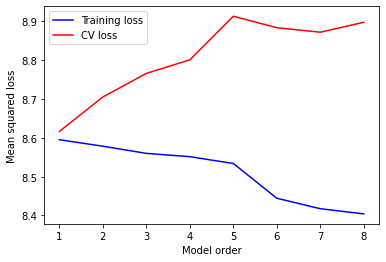

In [ ]:
import pylab as plt
%matplotlib inline
order = np.arange(min_order, max_order+1)
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
# plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')

##Results

In this graph of our data from Experiment 7, you can see that CV (cross-validation) loss quickly takes off while training loss takes until polynomial order 6 to show any significant decrease. Thus, we can assume that fitness in this graph is best inferred from the CV Loss never getting below its value with order of 1.

The model begins to overfit the data right from the beginning, which we will see makes sense in Experiment 10 and 12. This makes the order of best fit the linear model.

---

# Experiment 9
Use the entire training set to fit the best model given the results of experiment (8). What is the equation for this model? Find the final test MSE for this model.

Best model is linear.

Equation with $\LaTeX$:

$$y' = f(x_1,x_2;w_0,w_1,w_2) = w_0 + w_1x_1 + w_2x_2$$

In [ ]:
print(f"Final test MSE for the linear model:\n{getMSE(testX, trainW, test_y)}")

Final test MSE for the linear model:
8.000051210628891


##Results
 For experiment 9, we used the function defined in experiment 5 and used the entire training set to obtain the final test MSE for the model. Using this function we were able to obtain a value of 8.000051210628891  similar to experiment 6 due to it being a linear model.
  


---

#Experiment 10
Create a 3d scatterplot of the training data, with features x1 and x2 as the x and y axes and the response variable y as the z-axis. Can you see a pattern in the data?

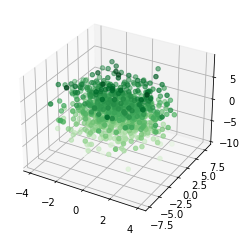

In [ ]:
#print out the visualization of the predicted plane vs actual data
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(-0.1, 2.1, 1)
xline = np.linspace(-2.1, 2.1, 1)
yline = np.linspace(-2.1, 2.1, 1)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = train_y
xdata = train_x1
ydata = train_x2
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

##Results

After graphing our dataset, we can see that it is an amorphous blob/cloud with very little shape that would lend itself well towards any particular order. The data does however, seem to be concentrated near the middle of the graph (possibly just a trick of having 2D perspective). This means that any polynomial order which would bring the plane graphed by the function away from the center would raise the MSE significantly. This is consistent with our CV_loss graph in experiment 8.

---

#Experiment 11
Create 3d surface plots for each of the models you found in experiments (3), (5), and (9).

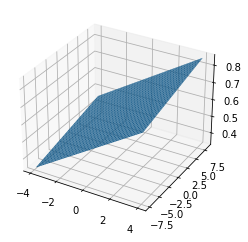

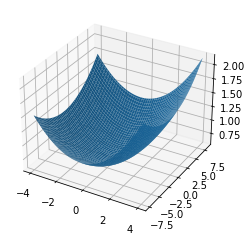

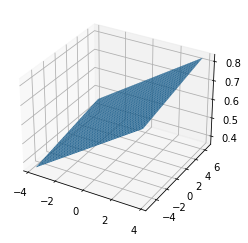

In [ ]:
# ax = plt.axes(projection='3d')

# # Data for a three-dimensional line
# zline = np.linspace(-0.1, 2.1, 1)
# xline = np.linspace(-2.1, 2.1, 1)
# yline = np.linspace(-2.1, 2.1, 1)
# ax.plot3D(xline, yline, zline, 'gray')

# predRes = np.dot(trainWQ.T, trainXQ.T)
# # plot the surface for part 3
# #ax.plot_surface(train_x1, train_x2, np.dot(trainW.T, trainX.T), alpha=0.2)
# # plot the surface for part 5
# X, Y = np.meshgrid(train_x1, train_x2)
# Z = predRes.T
# ax.plot_surface(X, Y, Z)

# plot the surface for part 3
fig3 = plt.figure()
ax3 = fig3.add_subplot(projection='3d')
x = np.linspace(train_x1.min() - .01, train_x1.max() + .01, 100)
y = np.linspace(train_x2.min() - .01, train_x2.max() + .01, 100)
X3, Y3 = np.meshgrid(x, y)
Z3 = np.ones_like(X3)
#Z3 = w0 + w1X + w2Y
Z3 = (Z3 * trainW[0]) + (X3 * trainW[1]) + (Y3 * trainW[2])
ax3.plot_surface(X3, Y3, Z3)

# plot the surface for part 5
fig5 = plt.figure()
ax5 = fig5.add_subplot(projection='3d')
x = np.linspace(train_x1.min() - .01, train_x1.max() + .01, 100)
y = np.linspace(train_x2.min() - .01, train_x2.max() + .01, 100)
X5, Y5 = np.meshgrid(x, y)
Z5 = np.ones_like(X5)
#Z5 = w0 + w1X + w2Y + w3X^2 + w4Y^2
Z5 = (Z5 * trainW[0]) + (X5 * trainW[1]) + (Y5 * trainW[2]) + ((X5 ** 2) * trainW[1]) + ((Y5 ** 2) * trainW[2])
ax5.plot_surface(X5, Y5, Z5)

# plot the surface for part 9
# linear as well
fig9 = plt.figure()
ax9 = fig9.add_subplot(projection='3d')
x = np.linspace(test_x1.min() - .01, test_x1.max() + .01, 100)
y = np.linspace(test_x2.min() - .01, test_x2.max() + .01, 100)
X9, Y9 = np.meshgrid(x, y)
Z9 = np.ones_like(X9)
#Z9 = w0 + w1X + w2Y
Z9 = (Z9 * trainW[0]) + (X9 * trainW[1]) + (Y9 * trainW[2])
ax9.plot_surface(X9, Y9, Z9)

## Results
The first surface plot shows the x1 training data on the X axis, the x2 training data on the Y axis, and the values predicted by the linear function on the Z axis. From this we can see that as x1 and x2 increase, z also increases linearly.

The second surface plot has the same x training values on the X and Y axis, but this time uses the values predicted by the quadratic function from Experiment 5 on the Z axis. The resulting graph shows that our Z values are parabolic on both the X and Y axis.

The final surface plot is the same as the first, since we found that the linear model performed the best in Experiment 9.

---

#Experiment 12
Create a plot using different colors to show the best fitting 3d surface from the previous experiment and the scatterplot from experiment (10). What does this suggest about the origin of the synthetic dataset?

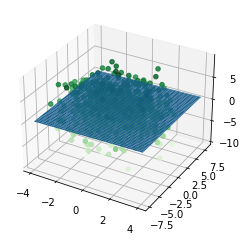

In [ ]:
fig12 = plt.figure()
ax12 = fig12.add_subplot(projection='3d')
# plot the surface for experiment 3
ax12.plot_surface(X3, Y3, Z3)

#scatterplot from experiment 10
ax12.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens', alpha=0.8);

##Results

The fact that a linear dataset best fits the data does not mean that the data itself is linear in this case. Instead, it means the data is most likely completely random. When data is completely random, the simplest average of values (lowest polynomial) will best be able to fit the randomness of further random data. More complex models will most likely overfit the data and find themselves predicting more difference in the values of further data.

---